(1025, 22403) (11469915,)


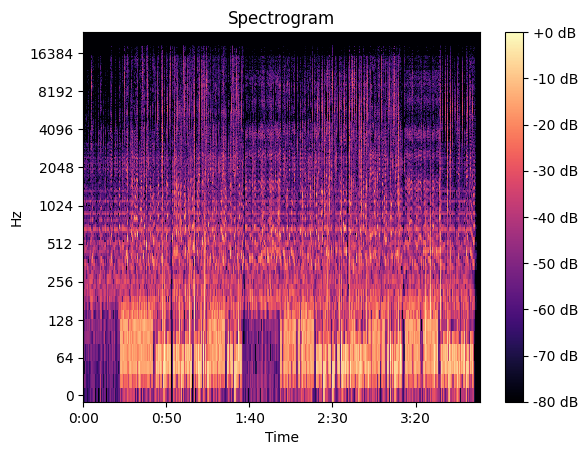

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# file_path = 'samples/sample-2.mp3'
file_path = "samples/Bas - Tribe with J.Cole.mp3"
y, sr = librosa.load(file_path, sr=None)

D_ref = librosa.stft(y)#,n_fft=512)
print(D_ref.shape,y.shape)
mag = np.abs(D_ref)

librosa.display.specshow(librosa.amplitude_to_db(mag, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [26]:
from pydub import AudioSegment
import numpy as np
# import matplotlib as plt
from decimal import Decimal

audio = AudioSegment.from_mp3("samples/440Hz_44100Hz_16bit_05sec.mp3")
samples = np.array(audio.get_array_of_samples())
samples = np.where(samples != 0)[0]

def DFT(x):
    n = len(x)
    out = []
    def kstep(k:int)->complex:
        """
        Calculate the k step sum for DFT
        int:k - the step to calculate
        
        Return
        complex:step - the complex number result
        """
        r,i = 0,0j
        
        # print(2*np.pi*k/n)
        # print(k/n)
        for t in range(1,n):
            angle = (2*np.pi*t*k/n)
            # print(x[t])
            r += x[t]*np.cos(angle)
            i += -x[t]*np.sin(angle)
            # if r != 0 or i != 0:
            #     print(t,r,i)
            return (r,i)
    for k in range(n):
        out.append(kstep(k))
    return out
D = DFT(samples)   

print(D[:20])


[(288.0, 0j), (287.9999998845651, (-0.008154171217413434+0j)), (287.99999953826034, (-0.01630834242829023+0j)), (287.9999989610858, (-0.024462513626093745+0j)), (287.9999981530415, (-0.032616684804287345+0j)), (287.99999711412727, (-0.04077085595633439+0j)), (287.99999584434323, (-0.048925027075698235+0j)), (287.9999943436894, (-0.05707919815584225+0j)), (287.9999926121657, (-0.06523336919022979+0j)), (287.9999906497723, (-0.07338754017232423+0j)), (287.999988456509, (-0.08154171109558891+0j)), (287.999986032376, (-0.08969588195348718+0j)), (287.9999833773731, (-0.09785005273948245+0j)), (287.9999804915004, (-0.10600422344703805+0j)), (287.9999773747579, (-0.11415839406961734+0j)), (287.9999740271456, (-0.12231256460068368+0j)), (287.9999704486635, (-0.13046673503370043+0j)), (287.9999666393116, (-0.138620905362131+0j)), (287.99996259908994, (-0.14677507557943864+0j)), (287.9999583279984, (-0.15492924567908684+0j))]
